# PHYS 411 - Homework 8
Due Wednesday November 3, 2022 at 9:30.

You can use these buttons below to launch this Jupyter notebook in either [binder](https://mybinder.org/) or [Colab](https://colab.research.google.com/).

[![Open in Binder](https://mybinder.org/badge_logo.svg)](http://beta.mybinder.org/v2/gh/mgrau/phys411/main?urlpath=%2Ftree/Homework%208.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mgrau/phys411/blob/main/Homework%208.ipynb)

When you are finished with your work, please either print to a PDF file and submit via canvas, or submit the raw Jupyter notebook file. For full credit please be sure to clearly explain what you are doing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import trapezoid

# Problem 1 - Dipole Matrix Element
Very roughly estimate the dipole matrix element of potassium in units of $e a_0$ (atomic units)
$$
\left< 4^2\text{S}_{1/2} \right| e \vec{r} \left| 4^2\text{P}_{1/2} \right>
$$
To do this, we will approximate the wavefunctions for the potassium $4^2\text{S}_{1/2}$ and $4^2\text{P}_{1/2}$ states as hydrogen wavefunctions. 

1. What are the quantum defects for the potassium $ns$ states and $np$ states. Use these to calculate new effective $n^*$ principal quantum numbers for these two states, instead of $n=4$.
2. Because the function below `R(r, n, l)` is only defined for integer values of $n$, round your values of $n^*$ to the nearest integer values
3. Calculate the dipole matrix element as the product of a radial and angular integral. For this crude approximation, assume the angular integral is about 1, and just calculate the radial integral,
$$
\int dr \; r^2 R_{n_1,l_1}(r) \times r \times R_{n_2,l_2}(r)
$$

In [2]:
from math import factorial
import scipy.special
def R(r, n=1, l=0):
    rho = 2*r/n
    A = np.sqrt((2/n)**3*factorial(n-l-1)/(2*n*factorial(n+l)))
    L = scipy.special.genlaguerre(n-l-1, 2*l+1)
    return A * rho**l * np.exp(-rho/2) * L(rho)

# Problem 2 - Rabi frequency
Assume we have 1mW of laser light focused to a 1mm radial waist, linearly polarized and with a wavelength of 770 nm, incident on the potassium atom.
1. Assuming the light is in the lowest order gaussian mode, what is the intensity of the light, in units of mW/cm$^2$?
2. What is the amplitude of the electric field, in units of V/m?
3. What is the angular frequency of the electric field oscillation, in units of $\omega = 2 \pi $ THz?
4. What is the Rabi frequency of the $4 ^2\text{S}_{1/2} \to 4 ^2\text{P}_{1/2}$ transition in potassium driven by this laser, in units of $\Omega = 2\pi$ MHz?

# Problem 3 - Lifetime
The Einstein coefficient between states $\left|1\right>$ and $\left|2\right>$. $A_{21}$ is related to the dipole matrix element $\left<1\right| \vec{r} \left| 2 \right>$ by
$$
A_{21} = \frac{g_1}{g_2} \frac{4 \alpha}{3 c^2} \omega_{12}^3 \left| \left<1\right| \vec{r} \left| 2 \right> \right|^2
$$
where $g_1$ and $g_2$ are the degeneracies of states $\left|1\right>$ and $\left|2\right>$.
1. What would you estimate is the lifetime of the $4 ^2\text{P}_{1/2}$ state of potassium, in ns?
2. What is the relative lifetime of the $4 ^2\text{P}_{1/2}$ and the $4 ^2\text{P}_{3/2}$ states?

# Problem 4 - Time evolution
The code below exactly solves the differential equation for the coefficients of the state
$$
\left| \Psi(t) \right> = c_1(t) \left| 1 \right> e^{i E_1 t/\hbar} + c_1(t) \left| 2 \right> e^{i E_1 t/\hbar}
$$
which is a superposition of two atomic eigenstates $\left| 1 \right>$ and $\left| 2 \right>$ with energies given by $\hbar \omega_0 = E_2 - E_1$, perturbed by radiation oscillating at frequency $\omega$.

Make figures for the following situations. For each, write a few sentences describing the figure, and what is happing to the atomic states

1. Resonant interaction, Rabi frequency $\Omega = \omega_0/100$
2. Resonant interaction, Rabi frequency $\Omega = \omega_0/10$
3. Resonant interaction, Rabi frequency much larger than $\omega_0$
4. Radiation frequency $\omega$ detuned from $\omega_0$ by the half the Rabi frequency
5. Radiation frequency $\omega$ detuned from $\omega_0$ by the twice the Rabi frequency

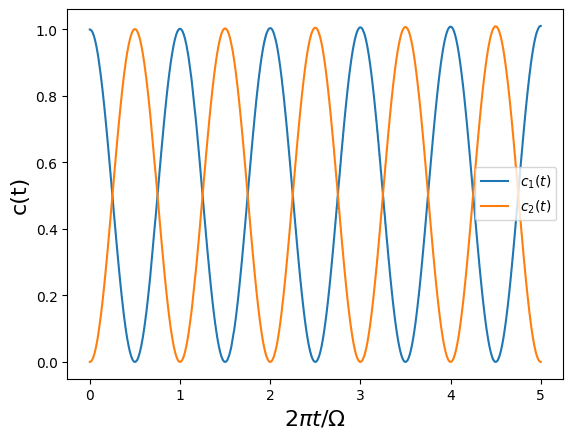

In [3]:
from scipy.integrate import solve_ivp
from math import pi as π

ω = 2*π*100
ω0 = 2*π*100
Ω = 2*π*1
t = np.linspace(0, 2*π/Ω*5, 10000)

def dc(t, c):
    return np.array(
    [
        -1j * Ω * np.cos(ω*t) * np.exp(-1j*ω0*t) * c[1],
        -1j * Ω * np.cos(ω*t) * np.exp(+1j*ω0*t) * c[0]
    ])

y = solve_ivp(dc, [np.min(t), np.max(t)], np.array([1+0j, 0+0j]), t_eval=t, method='DOP853')
plt.plot(y.t, np.abs(y.y[0,:])**2, label='$c_1(t)$')
plt.plot(y.t, np.abs(y.y[1,:])**2, label='$c_2(t)$')
plt.xlabel('$2\pi t/\Omega$', fontsize=16)
plt.ylabel('c(t)', fontsize=16)
plt.legend()